In [13]:
import rasterio
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
from collections import OrderedDict
from shapely.geometry import Point, Polygon
from pathlib import Path
import os
from rasterio.enums import ColorInterp
from rasterio.enums import Resampling
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib  inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Download image from sentinel2

In [3]:
sentinel_user = os.environ['copernicus_sentinel_user']
sentinel_password = os.environ['copernicus_sentinel_password']

api = SentinelAPI(sentinel_user,sentinel_password, 'https://scihub.copernicus.eu/dhus')

In [4]:
# construct london's bounding box
pointList = [Point(-0.5103751, 51.2867602), Point(-0.3340155, 51.2867602),  Point(-0.3340155,51.6918741),  Point(-0.5103751,51.6918741)]
london_poly = Polygon([[p.x, p.y] for p in pointList])


In [5]:
footprint =london_poly.wkt
products = api.query(footprint,
                     producttype='S2MSI2A',
                     date=("NOW-7DAY", "NOW"),
                     platformname='Sentinel-2')
# convert to Pandas DataFrame
products_df = api.to_dataframe(products)
products_df

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,instrumentshortname,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid
20bb15e3-79b4-4e25-92f4-8e18a63c0e11,S2B_MSIL2A_20200627T105619_N0214_R094_T30UXB_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-27T10:56:19.024Z, Instrument: MS...",2020-06-27 10:56:19.024,2020-06-27 10:56:19.024,2020-06-27 20:51:30.250,17280,94,...,MSI,437.43 MB,GS2B_20200627T105619_017280_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200627T105619_N0214_R094_T30UXB_2...,20bb15e3-79b4-4e25-92f4-8e18a63c0e11
e02d43c3-e82e-4cc7-a66a-cdfa9e378f48,S2B_MSIL2A_20200627T105619_N0214_R094_T30UXC_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-27T10:56:19.024Z, Instrument: MS...",2020-06-27 10:56:19.024,2020-06-27 10:56:19.024,2020-06-27 20:51:16.949,17280,94,...,MSI,257.33 MB,GS2B_20200627T105619_017280_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200627T105619_N0214_R094_T30UXC_2...,e02d43c3-e82e-4cc7-a66a-cdfa9e378f48
811b432c-41c0-4926-b9e6-2aa9937a4cf5,S2A_MSIL2A_20200625T110631_N0214_R137_T30UXB_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-25T11:06:31.025Z, Instrument: MS...",2020-06-25 11:06:31.025,2020-06-25 11:06:31.025,2020-06-25 19:05:59.670,26160,137,...,MSI,1.03 GB,GS2A_20200625T110631_026160_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200625T110631_N0214_R137_T30UXB_2...,811b432c-41c0-4926-b9e6-2aa9937a4cf5
7b12c25e-7623-4a6b-91eb-d68d23cf2141,S2A_MSIL2A_20200625T110631_N0214_R137_T30UXC_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-25T11:06:31.025Z, Instrument: MS...",2020-06-25 11:06:31.025,2020-06-25 11:06:31.025,2020-06-25 18:53:45.129,26160,137,...,MSI,1.12 GB,GS2A_20200625T110631_026160_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200625T110631_N0214_R137_T30UXC_2...,7b12c25e-7623-4a6b-91eb-d68d23cf2141


In [7]:
output_directory = Path("/media/wwymak/Storage/surface_water_changes_satellite_data/sentinel")
tile_to_download = products_df.title[0]
output_filepath = output_directory / tile_to_download
api.download(products_df.uuid[0], directory_path=output_directory)

Downloading: 100%|██████████| 459M/459M [10:07<00:00, 755kB/s] 
MD5 checksumming: 100%|██████████| 459M/459M [00:00<00:00, 754MB/s] 


{'id': '20bb15e3-79b4-4e25-92f4-8e18a63c0e11',
 'title': 'S2B_MSIL2A_20200627T105619_N0214_R094_T30UXB_20200627T134914',
 'size': 458731751,
 'md5': 'BD88C0248D98C07BEEDE369BF18014E5',
 'date': datetime.datetime(2020, 6, 27, 10, 56, 19, 24000),
 'footprint': 'POLYGON((-0.9624939 50.44347946588406,-0.92092896 50.54761290588485,-0.86239624 50.69352721174252,-0.80340576 50.83944474651344,-0.74401855 50.98535432299034,-0.6842346 51.131230435741045,-0.62457275 51.27720367563696,-0.56430054 51.42309618134356,-0.56417847 51.423394515717085,0.017025008525814 51.41234265506691,-0.046142578 50.42629366061962,-0.9624939 50.44347946588406))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('20bb15e3-79b4-4e25-92f4-8e18a63c0e11')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2020, 6, 27, 20, 52, 20, 507000),
 'Ingestion Date': datetime.datetime(2020, 6, 27, 20, 51, 30, 250000),
 'path': '/media/wwymak/Storage/surface_water_changes_satellite_data/sentinel/S2B_MSIL2A_2020

In [9]:
!unzip {output_directory/'S2B_MSIL2A_20200627T105619_N0214_R094_T30UXB_20200627T134914.zip'} -d {output_directory} >/dev/null

In [10]:
image_files_directory = output_directory/f'{products_df.title[0]}.SAFE'/'GRANULE'/'L2A_T30UXB_A017280_20200627T105814'/ 'IMG_DATA'
os.listdir(image_files_directory)

['R60m', 'R20m', 'R10m']

These folders correspond to the different resolutions of the satellite imagery-- sentinel bands come in different resolutions: (https://gisgeography.com/sentinel-2-bands-combinations/)

|Band|Resolution|Central Wavelength|Description|
|--- |--- |--- |--- |
|B1|60 m|443 nm|Ultra blue (Coastal and Aerosol)|
|B2|10 m|490 nm|Blue|
|B3|10 m|560 nm|Green|
|B4|10 m|665 nm|Red|
|B5|20 m|705 nm|Visible and Near Infrared (VNIR)|
|B6|20 m|740 nm|Visible and Near Infrared (VNIR)|
|B7|20 m|783 nm|Visible and Near Infrared (VNIR)|
|B8|10 m|842 nm|Visible and Near Infrared (VNIR)|
|B8a|20 m|865 nm|Visible and Near Infrared (VNIR)|
|B9|60 m|940 nm|Short Wave Infrared (SWIR)|
|B10|60 m|1375 nm|Short Wave Infrared (SWIR)|
|B11|20 m|1610 nm|Short Wave Infrared (SWIR)|
|B12|20 m|2190 nm|Short Wave Infrared (SWIR)|

To make a blue, red, green image we want the B2, B3, and B4 bands

In [6]:
image_files_directory = Path('/media/wwymak/Storage/surface_water_changes_satellite_data/sentinel')/'S2B_MSIL2A_20200627T105619_N0214_R094_T30UXB_20200627T13491.SAFE'/'GRANULE'/'L2A_T30UXB_A017280_20200627T105814'/ 'IMG_DATA'
img_file_b2 = image_files_directory / 'R10m'/'T30UXB_20200627T105619_B02_10m.jp2'
img_file_b3 = image_files_directory / 'R10m'/'T30UXB_20200627T105619_B03_10m.jp2'
img_file_b4 = image_files_directory / 'R10m'/'T30UXB_20200627T105619_B04_10m.jp2'

In [12]:
with rasterio.open(img_file_b2, driver='JP2OpenJPEG') as dataset:
    array = dataset.read(1)
    print(dataset.profile)

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 5700000.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True}


In [13]:
def write_image(input_filename, output, color_interp):
    with rasterio.open(input_filename, driver='JP2OpenJPEG') as src_dataset:
        array = src_dataset.read(1)

        kwds = src_dataset.profile

        # Change the format driver for the destination dataset to
        # 'GTiff', short for GeoTIFF.
        kwds['driver'] = 'GTiff'

        # Add GeoTIFF-specific keyword arguments.
        kwds['tiled'] = True
        kwds['blockxsize'] = 256
        kwds['blockysize'] = 256
        kwds['photometric'] = color_interp
        kwds['compress'] = 'JPEG'
        kwds['dtype']=rasterio.uint8

        with rasterio.open(output, 'w', **kwds) as dst_dataset:
            # Write data to the destination dataset.
            dst_dataset.write(array.astype(rasterio.uint8), 1)

In [10]:
output_directory_processed = Path('/media/wwymak/Storage/surface_water_changes_satellite_data/sentinel/S2B_MSIL2A_20200627T105619_N0214_R094_T30UXB_20200627T134914.SAFE/processed')

file_list = [output_directory_processed/x for x in ['red.tif', 'green.tif', 'blue.tif']]
colors_list = [ColorInterp.red, ColorInterp.green, ColorInterp.blue]
input_files = [img_file_b4, img_file_b3, img_file_b2 ]
# [write_image(input_file,output_file, color) for input_file,output_file, color in zip(input_files, file_list, colors_list)]

# Read metadata of first file
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers
meta.update(count = len(file_list), photometric="RGB", width=256, height=256)
upscale_factor = 1/30
# Read each layer and write it to stack
with rasterio.open(output_directory_processed/'stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(file_list, start=1):
        with rasterio.open(layer) as dataset:
            data = dataset.read(1,
                out_shape=(
                    dataset.count,
                    256, 256
                ),
                resampling=Resampling.bilinear
            )
            dst.write_band(id, data)

    # scale image transform
#     transform = dataset.transform * dataset.transform.scale(
#         (dataset.width / data.shape[-1]),
#         (dataset.height / data.shape[-2])
#     )
            

In [2]:
output_directory_processed = Path('/media/wwymak/Storage/surface_water_changes_satellite_data/sentinel/S2B_MSIL2A_20200627T105619_N0214_R094_T30UXB_20200627T134914.SAFE/processed')

In [11]:
from tensorflow.keras.preprocessing.image import load_img
img = load_img(
    output_directory_processed/'stack.tif', grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
)

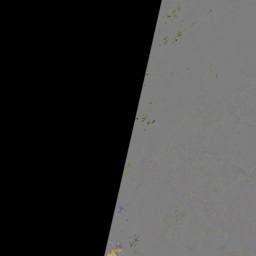

In [27]:
img

In [23]:
np.array(img).dtype

dtype('uint8')

dtype('float32')